# **----Decision Tree Classifier**

In [ ]:
## Decision Tree modeli Overfitting olmaya (fazla öğrenmeye) müsaittir cevapları ezberleyebilir

In [12]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier , export_graphviz
import graphviz

from sklearn.model_selection import train_test_split

In [13]:
df = pd.read_csv("heart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
y = df["output"]

x = df.drop("output" , axis = 1)

In [15]:
tree = DecisionTreeClassifier()
model=tree.fit(x,y)
model.score(x,y)

1.0

In [ ]:
####### train_test_split ile yapılış

In [16]:
x_train , x_test , y_train , y_test = train_test_split(x , y , train_size=0.70 , random_state=16)

tree = DecisionTreeClassifier()

model=tree.fit(x_train,y_train)

model.score(x_test , y_test)

0.7802197802197802



# **----Export Graphviz , Graphviz Görselleştirme Decision Tree**


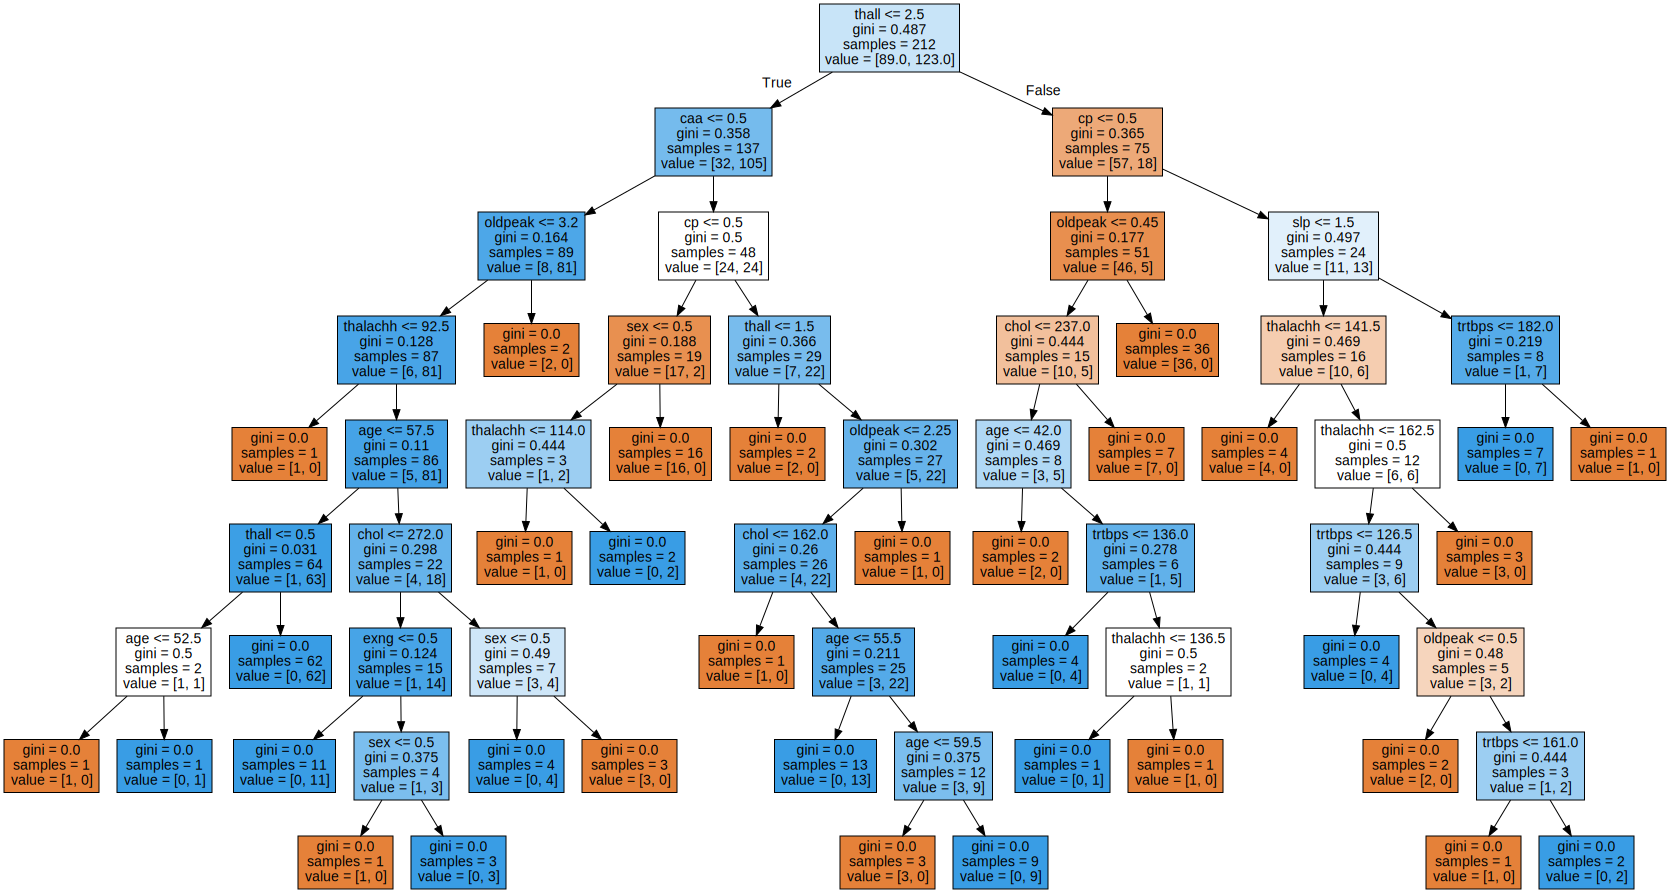

In [17]:
dot = export_graphviz(model , feature_names = x.columns , filled = True)

gorsel = graphviz.Source(dot)

gorsel

# **-----Random Forest Classifier**

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
forest = RandomForestClassifier()

model = forest.fit(x , y)

model.score(x,y)

1.0

In [29]:
forest = RandomForestClassifier(n_estimators=200 , max_depth=5) # max_depth fazla verilirse ezber artar

model = forest.fit(x_train , y_train)

model.score(x_test , y_test)

0.8571428571428571

# ----XGB XGBoost Boosting Sınıflandırma Model

In [30]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

from sklearn.model_selection import train_test_split

In [32]:
df = pd.read_csv("heart.csv")
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [33]:
y = df["output"]

x= df.drop("output" , axis=1)

In [34]:
x_train , x_test , y_train , y_test =train_test_split(x , y , random_state = 42 ,train_size=0.7 )

In [35]:
dt = DecisionTreeClassifier()
model = dt.fit(x , y)
model.score(x,y)

1.0

In [36]:
dt = DecisionTreeClassifier()
model = dt.fit(x_train , y_train)
model.score(x_test , y_test)

0.7252747252747253

In [42]:
rf = RandomForestClassifier(n_estimators=200)
model = rf.fit(x_train , y_train)
model.score(x_test , y_test)

0.8241758241758241

In [38]:
a = xgb.XGBClassifier()
model = a.fit(x_train , y_train)
model.score(x_test , y_test)

0.8131868131868132

# **---Random Forest Regressor**

In [ ]:
# regresyon devamlı sayılar arasında tahmin yapmaya yarar

In [56]:
import pandas as np
import numpy as np

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

In [46]:
df = pd.read_csv("insurance.csv")
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [47]:
df = pd.get_dummies(df , columns=["sex" , "smoker" , "region"] , drop_first = True )

In [48]:
y = df["charges"]

x= df.drop("charges" , axis = 1)

In [49]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state = 22 , train_size = 0.7)

In [50]:
lr = LinearRegression()
model = lr.fit(x_train , y_train)
model.score(x_test , y_test)

0.7398405242767803

In [57]:
rf = RandomForestRegressor(n_estimators = 200)
model = rf.fit(x_train , y_train)
model.score(x_test , y_test)

0.8254420718953279

# **----StandardScaler , MinMaxScaler , Normalizasyon Nedir ? Nasıl Yapılır ?**

In [68]:
import pandas as pd

import numpy as np

from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [69]:
df = pd.read_csv("uçak.csv")
df.head(3)

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0


In [70]:
df = df[["Rcmnd cruise Knots","Stall Knots dirty","Fuel gal/lbs","Eng out rate of climb","Price"]]
df.head(3)

,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,Eng out rate of climb,Price
0,91.0,46.0,36,900.0,1300000.0
1,83.0,44.0,15,720.0,1230000.0
2,78.0,37.0,19,475.0,1600000.0


In [71]:
y = df["Price"]

x = df.drop("Price" , axis = 1)

df.dropna()

,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,Eng out rate of climb,Price
0,91.0,46.0,36,900.0,1300000.0
1,83.0,44.0,15,720.0,1230000.0
2,78.0,37.0,19,475.0,1600000.0
3,78.0,37.0,19,500.0,1300000.0
4,74.0,33.0,14,632.0,1250000.0
...,...,...,...,...,...
511,265.0,64.0,402,2300.0,3000000.0
513,288.0,89.0,578,2280.0,3584000.0
514,275.0,87.0,390,3230.0,3200000.0
515,270.0,77.0,382,2940.0,3240000.0


In [ ]:
# Y İÇİN NORMALİZE ASLA YAPILMAZ

# OUTLİER ETKİSİNİ AZALTIR

#MODEL PERFORMANSI ARTTIRIR

In [72]:
ss = StandardScaler()
x2 = ss.fit_transform(x)
x2

array([[-1.05390081, -0.88915012, -0.32365945, -1.01415845],
       [-1.13069272, -1.00933951, -0.32857267, -1.17083548],
       [-1.17868766, -1.43000238, -0.32763682, -1.38409032],
       ...,
       [ 0.71231312,  1.57473244, -0.24083657,  1.01393863],
       [ 0.66431818,  0.97378547, -0.24270827,  0.76151453],
       [ 0.65471919,  0.85359608, -0.24270827, -0.07409629]])

In [77]:
x2 = pd.DataFrame(x2)
x2.head(3)

,0,1,2,3
0,-1.053901,-0.889150,-0.323659,-1.014158
1,-1.130693,-1.009340,-0.328573,-1.170835
2,-1.178688,-1.430002,-0.327637,-1.384090


In [80]:
x2[1].mean()

np.float64(-9.907966434901795e-17)

In [81]:
x2[1].std()

1.0009975064824246

In [84]:
mm = MinMaxScaler()

In [85]:
x3 = mm.fit_transform(x)

In [87]:
x3 = pd.DataFrame(x3)
x3.head(3)

,0,1,2,3
0,0.047619,0.215909,0.000586,0.074541
1,0.029478,0.193182,0.000073,0.044254
2,0.018141,0.113636,0.000171,0.003029


In [ ]:
# arabaların yılları = 1900 - 2025 arası olunca 1900 ü sayı doğrusundaki 0 olarak alıp 2025 i 1 olarak alıyor ve oran veriyor

# arabaların km si 100.000 - 200.000 arası ise 100.000==0 200.000== 1 alıp yine oran veriyo bu sayede oranlar ile daha doğru işleme giriyorlar